In [41]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [42]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

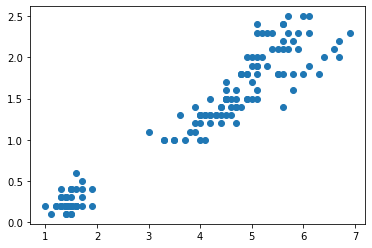

In [43]:
df  = pd.DataFrame(iris.data, columns=iris.feature_names)

df

df = df.drop(columns=['sepal length (cm)','sepal width (cm)'], axis='columns')

plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [44]:
km = KMeans()

y_pred = km.fit_predict(df)

df['cluster'] = y_pred
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,3


In [45]:
km.cluster_centers_

array([[4.06666667, 1.24444444],
       [1.462     , 0.246     ],
       [5.05909091, 1.93636364],
       [5.74666667, 2.28666667],
       [4.60416667, 1.44166667],
       [5.7375    , 1.7375    ],
       [3.41428571, 1.05714286],
       [6.6       , 2.06666667]])

In [46]:
df.cluster.unique()

array([1, 4, 0, 6, 2, 3, 5, 7])

### If preprocessing applied

In [47]:
s = MinMaxScaler()
s.fit(df[['petal length (cm)']])
df['petal length (cm)'] = s.transform(df[['petal length (cm)']])

In [48]:
s.fit(df[['petal width (cm)']])
df['petal width (cm)'] = s.transform(df[['petal width (cm)']])

In [49]:
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


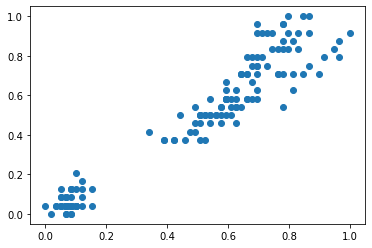

In [50]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [51]:
km = KMeans()

y_pred = km.fit_predict(df)

df['cluster'] = y_pred
df

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,3
146,0.677966,0.750000,3
147,0.711864,0.791667,3
148,0.745763,0.916667,5


In [52]:
km.cluster_centers_

array([[7.83050847e-02, 6.08333333e-02, 1.00000000e+00],
       [6.10875706e-01, 5.59027778e-01, 4.00000000e+00],
       [4.09200969e-01, 3.98809524e-01, 6.00000000e+00],
       [6.87981510e-01, 7.65151515e-01, 2.00000000e+00],
       [5.19774011e-01, 4.76851852e-01, 4.44089210e-16],
       [8.04519774e-01, 9.11111111e-01, 3.00000000e+00],
       [9.49152542e-01, 8.19444444e-01, 7.00000000e+00],
       [8.02966102e-01, 6.82291667e-01, 5.00000000e+00]])

### Elbow plot

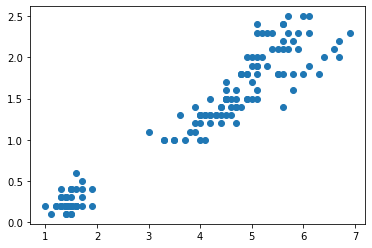

In [53]:
df  = pd.DataFrame(iris.data, columns=iris.feature_names)

df

df = df.drop(columns=['sepal length (cm)','sepal width (cm)'], axis='columns')

plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [54]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [55]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

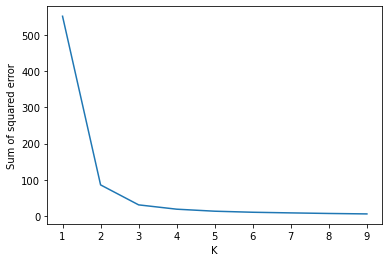

In [56]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [57]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [58]:
df['cluster'] = yp
df.head()


,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [59]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [60]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

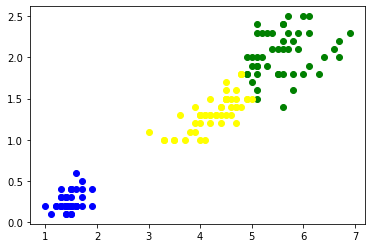

In [61]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')